In [2]:
import cv2
import numpy as np

In [12]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sem 2 - IP and CV/Geometrical_Shapes.png')

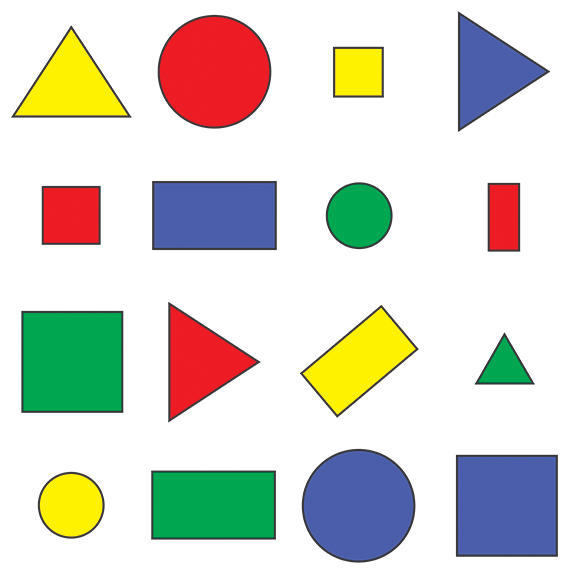

In [13]:
from google.colab.patches import cv2_imshow
# Show the result
cv2_imshow(image)

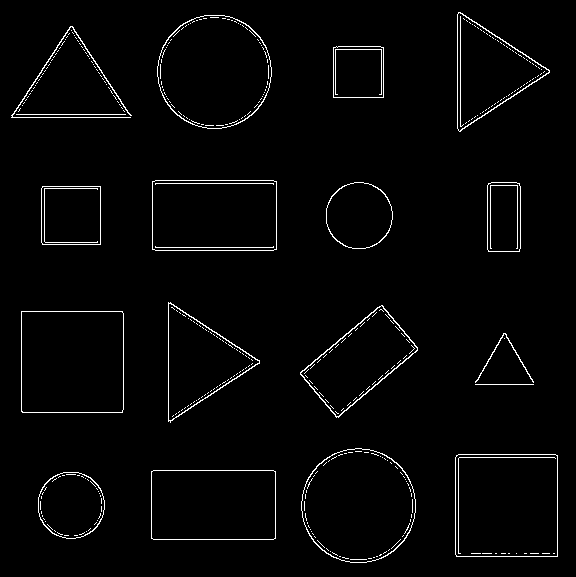

In [15]:
# Apply GaussianBlur to reduce noise and help Canny edge detection
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

# Show the original image and the result
#cv2_imshow(image)
cv2_imshow(edges)

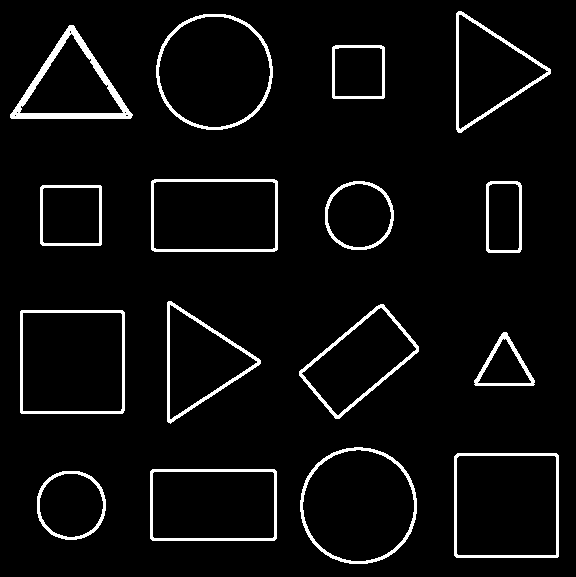

In [18]:
# Find contours in the edge image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank image to draw contours on
contour_image = np.zeros_like(image)

# Draw contours on the blank image
cv2.drawContours(contour_image, contours, -1, (255, 255, 255), 2)

# Show the contours image

cv2_imshow(contour_image)

In [31]:
from tabulate import tabulate

image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Sem 2 - IP and CV/Geometrical_Shapes.png', cv2.IMREAD_GRAYSCALE)

# Find contours in the edge image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank image to draw contours on
contour_image = np.zeros_like(image)

# Draw contours on the blank image
cv2.drawContours(contour_image, contours, -1, (255, 255, 255), 2)

# List to store details for contours with area > 0
details_report = []

# Iterate through each contour
for idx, contour in enumerate(contours):
    # Calculate the area of the contour
    area = cv2.contourArea(contour)

    # Check if area is greater than 0
    if area > 0:
        # Calculate the bounding box
        x, y, w, h = cv2.boundingRect(contour)

        # Calculate the minimum enclosing circle
        (center, radius) = cv2.minEnclosingCircle(contour)
        radius = int(radius)

        # Get the number of vertices in the contour
        num_vertices = len(cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True))

        # Calculate circularity for detecting circles
        circularity = 4 * np.pi * area / (cv2.arcLength(contour, True) ** 2)

        # Guess the shape based on the number of vertices and circularity
        if num_vertices == 3:
            shape = "Triangle"
        elif num_vertices == 4 and circularity > 0.7:
            shape = "Square/Rectangle"
        elif num_vertices == 5:
            shape = "Pentagon"
        elif num_vertices == 6:
            shape = "Hexagon"
        elif circularity > 0.8:
            shape = "Circle"
        else:
            shape = "Unknown"

        # Add details to the report
        details_report.append({
            "Contour": idx + 1,
            "Area": area,
            "Bounding Box": {"X": x, "Y": y, "Width": w, "Height": h},
            "Enclosing Circle": {"Center": (int(center[0]), int(center[1])), "Radius": radius},
            "Num Vertices": num_vertices,
            "Shape": shape
        })

# Print the details report in table format
table_headers = ["Contour", "Area", "Bounding Box", "Enclosing Circle", "Num Vertices", "Shape"]
table_data = []

for details in details_report:
    table_data.append([
        details["Contour"],
        details["Area"],
        details["Bounding Box"],
        details["Enclosing Circle"],
        details["Num Vertices"],
        details["Shape"]
    ])

print(tabulate(table_data, headers=table_headers, tablefmt="pretty"))

# Show the original image with bounding boxes and enclosing circles

cv2.waitKey(0)
cv2.destroyAllWindows()

+---------+---------+---------------------------------------------------+--------------------------------------+--------------+------------------+
| Contour |  Area   |                   Bounding Box                    |           Enclosing Circle           | Num Vertices |      Shape       |
+---------+---------+---------------------------------------------------+--------------------------------------+--------------+------------------+
|    1    | 3481.5  |  {'X': 38, 'Y': 472, 'Width': 67, 'Height': 67}   | {'Center': (70, 504), 'Radius': 33}  |      8       |      Circle      |
|    2    | 8550.0  | {'X': 151, 'Y': 470, 'Width': 125, 'Height': 70}  | {'Center': (213, 504), 'Radius': 70} |      4       | Square/Rectangle |
|    3    | 10397.0 | {'X': 455, 'Y': 454, 'Width': 103, 'Height': 103} | {'Center': (506, 505), 'Radius': 71} |      4       | Square/Rectangle |
|    4    | 10220.0 | {'X': 301, 'Y': 448, 'Width': 115, 'Height': 115} | {'Center': (358, 505), 'Radius': 57} |      